<a href="https://colab.research.google.com/github/uervitonsantos/Deteccao_de_faces_em_fotografias/blob/main/Detec%C3%A7%C3%A3o_de_faces_em_fotografias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import cv2

In [107]:
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [108]:
# Caminho para a pasta contendo as imagens
pasta_imagens = '/content/drive/MyDrive/Imagens'

# Lista de extensões de arquivo de imagem suportadas
extensoes_suportadas = ['.jpg', '.jpeg', '.png', '.gif']

# Obtém todos os arquivos na pasta
arquivos_na_pasta = os.listdir(pasta_imagens)

# Filtra apenas os arquivos de imagem
imagens = [os.path.join(pasta_imagens, arquivo) for arquivo in arquivos_na_pasta if os.path.splitext(arquivo)[1].lower() in extensoes_suportadas]


In [111]:
def detectar_faces_em_imagem(image_path):
    # Carregue a imagem
    image = cv2.imread(image_path)

    # Redimensione a imagem
    nova_largura = 540
    nova_altura = int(image.shape[0] * (nova_largura / image.shape[1]))
    image_redimensionada = cv2.resize(image, (nova_largura, nova_altura))

    # Caminho para um classificador mais robusto
    cascade_path = '/content/drive/MyDrive/Imagens/haarcascade_frontalface_alt2.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

    # Converta a imagem para escala de cinza
    gray = cv2.cvtColor(image_redimensionada, cv2.COLOR_BGR2GRAY)

    # Detecte faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Desenhe retângulos ao redor de cada face encontrada
    for (x, y, w, h) in faces:
        cv2.rectangle(image_redimensionada, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Mostre a imagem com os retângulos
    cv2_imshow(image_redimensionada)

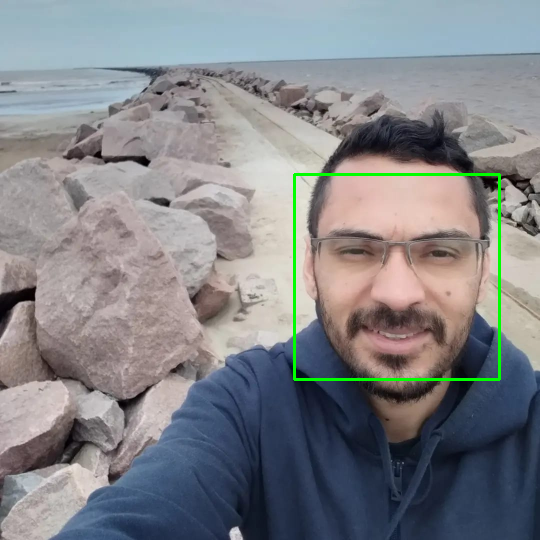

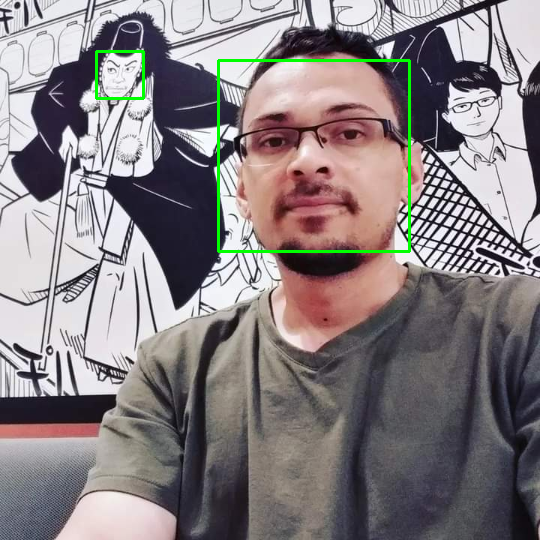

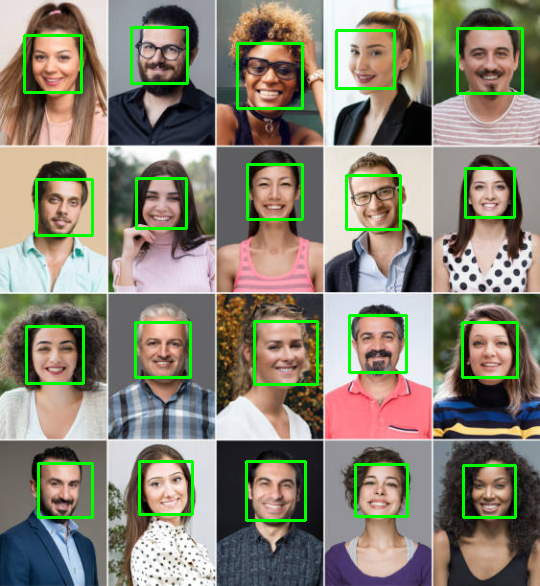

In [112]:
# Processar cada imagem
for imagem_path in imagens:
    detectar_faces_em_imagem(imagem_path)